In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
pickle_in = open('/content/drive/MyDrive/IIM Nagpur NLP Files/CellPhoneTopicandVotesDF(votelogten_and_outliers_removed).pickle', 'rb')
df = pickle.load(pickle_in)
df

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic,total_imp_topics,custom_topic_name,votes,votes_copy,votelogten
0,0.01,0.01,0.01,0.14,0.01,0.01,0.81,6,2,NaN,2.0,2.0,0.301030
1,0.00,0.07,0.00,0.05,0.12,0.10,0.66,6,5,NaN,15.0,15.0,1.176091
2,0.04,0.00,0.00,0.36,0.00,0.00,0.58,6,2,NaN,11.0,11.0,1.041393
3,0.35,0.01,0.13,0.08,0.01,0.16,0.27,0,5,politics,4.0,4.0,0.602060
4,0.02,0.09,0.00,0.26,0.14,0.00,0.50,6,4,NaN,12.0,12.0,1.079181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53621,0.03,0.83,0.03,0.03,0.03,0.03,0.03,1,1,science,0.0,1.0,0.000000
53622,0.07,0.07,0.57,0.07,0.07,0.07,0.07,2,7,Math,0.0,1.0,0.000000
53623,0.19,0.69,0.02,0.02,0.02,0.02,0.02,1,2,science,0.0,1.0,0.000000
53624,0.07,0.07,0.07,0.57,0.07,0.07,0.07,3,7,English,2.0,2.0,0.301030


In [ ]:
len(df.index)

53626

In [ ]:
df['votes'].value_counts()

0.0      43075
2.0       3144
3.0       1670
4.0       1055
5.0        688
         ...  
318.0        1
137.0        1
359.0        1
102.0        1
186.0        1
Name: votes, Length: 261, dtype: int64

In [ ]:
df[(df['votes'] >= 0) & (df['votes'] <= 10)]

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic,total_imp_topics,custom_topic_name,votes,votes_copy,votelogten
0,0.01,0.01,0.01,0.14,0.01,0.01,0.81,6,2,NaN,2.0,2.0,0.301030
3,0.35,0.01,0.13,0.08,0.01,0.16,0.27,0,5,politics,4.0,4.0,0.602060
5,0.09,0.05,0.03,0.11,0.02,0.16,0.55,6,5,NaN,2.0,2.0,0.301030
7,0.01,0.01,0.01,0.01,0.01,0.22,0.72,6,2,NaN,2.0,2.0,0.301030
8,0.04,0.00,0.00,0.19,0.33,0.18,0.25,4,4,Hindi,6.0,6.0,0.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53621,0.03,0.83,0.03,0.03,0.03,0.03,0.03,1,1,science,0.0,1.0,0.000000
53622,0.07,0.07,0.57,0.07,0.07,0.07,0.07,2,7,Math,0.0,1.0,0.000000
53623,0.19,0.69,0.02,0.02,0.02,0.02,0.02,1,2,science,0.0,1.0,0.000000
53624,0.07,0.07,0.07,0.57,0.07,0.07,0.07,3,7,English,2.0,2.0,0.301030


In [ ]:
df['votes'].corr(df['Topic1'])

-0.02032891763634142

# Neural Networks (7 topics and actual votes values with 1096 neurons in output)

In [ ]:
df['votes'].max()

1095.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
X = df[df.columns[:7]]
X

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6
0,0.01,0.01,0.01,0.14,0.01,0.01,0.81
1,0.00,0.07,0.00,0.05,0.12,0.10,0.66
2,0.04,0.00,0.00,0.36,0.00,0.00,0.58
3,0.35,0.01,0.13,0.08,0.01,0.16,0.27
4,0.02,0.09,0.00,0.26,0.14,0.00,0.50
...,...,...,...,...,...,...,...
53621,0.03,0.83,0.03,0.03,0.03,0.03,0.03
53622,0.07,0.07,0.57,0.07,0.07,0.07,0.07
53623,0.19,0.69,0.02,0.02,0.02,0.02,0.02
53624,0.07,0.07,0.07,0.57,0.07,0.07,0.07


In [ ]:
y = df['votes']
y

0         2.0
1        15.0
2        11.0
3         4.0
4        12.0
         ... 
53621     0.0
53622     0.0
53623     0.0
53624     2.0
53625     9.0
Name: votes, Length: 53626, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((42900, 7), (10726, 7))

In [ ]:
y_train.shape, y_test.shape

((42900,), (10726,))

In [ ]:
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation='relu', input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1096, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])  # sparse_categorical_crossentropy

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100, epochs = 10)

Epoch 1/10
288/288 [==============================] - 6s 18ms/step - loss: 1.7352 - accuracy: 0.7882 - val_loss: 0.9994 - val_accuracy: 0.8034
Epoch 2/10
288/288 [==============================] - 5s 17ms/step - loss: 0.9914 - accuracy: 0.8015 - val_loss: 0.9822 - val_accuracy: 0.8034
Epoch 3/10
288/288 [==============================] - 5s 17ms/step - loss: 0.9803 - accuracy: 0.8015 - val_loss: 0.9828 - val_accuracy: 0.8034
Epoch 4/10
288/288 [==============================] - 5s 18ms/step - loss: 0.9744 - accuracy: 0.8015 - val_loss: 0.9800 - val_accuracy: 0.8034
Epoch 5/10
288/288 [==============================] - 5s 17ms/step - loss: 0.9689 - accuracy: 0.8015 - val_loss: 0.9781 - val_accuracy: 0.8034
Epoch 6/10
288/288 [==============================] - 3s 11ms/step - loss: 0.9661 - accuracy: 0.8015 - val_loss: 0.9759 - val_accuracy: 0.8034
Epoch 7/10
288/288 [==============================] - 3s 9ms/step - loss: 0.9613 - accuracy: 0.8015 - val_loss: 0.9743 - val_accuracy: 0.8034


In [ ]:
# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# Neural Networks (7 topics and votelogten)

In [ ]:
X = df[df.columns[:7]]
X = np.asarray(X).astype('float32')

In [ ]:
y = df['votelogten']
y = np.asarray(y).astype('float32')
y

array([0.30103  , 1.1760913, 1.0413927, ..., 0.       , 0.30103  ,
       0.9542425], dtype=float32)

In [ ]:
df['votelogten'].max()

3.0394141191761372

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y

array([0.30103  , 1.1760913, 1.0413927, ..., 0.       , 0.30103  ,
       0.9542425], dtype=float32)

In [ ]:
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation='relu', input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 4, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])  # sparse_categorical_crossentropy

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100, epochs = 10)

Epoch 1/10
288/288 [==============================] - 2s 4ms/step - loss: 0.2255 - accuracy: 0.7905 - val_loss: 0.1692 - val_accuracy: 0.8034
Epoch 2/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1681 - accuracy: 0.8015 - val_loss: 0.1653 - val_accuracy: 0.8034
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1659 - accuracy: 0.8015 - val_loss: 0.1647 - val_accuracy: 0.8034
Epoch 4/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1657 - accuracy: 0.8015 - val_loss: 0.1648 - val_accuracy: 0.8034
Epoch 5/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.8015 - val_loss: 0.1621 - val_accuracy: 0.8034
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 0.1643 - accuracy: 0.8015 - val_loss: 0.1624 - val_accuracy: 0.8034
Epoch 7/10
288/288 [==============================] - 1s 3ms/step - loss: 0.1636 - accuracy: 0.8015 - val_loss: 0.1640 - val_accuracy: 0.8034
Epoch 

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_test[8]

0.90309

In [ ]:
# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import multilabel_confusion_matrix
# cm = multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
y_pred

array([[9.8609793e-01, 1.3610512e-02, 2.6653096e-04, 2.5026293e-05],
       [9.5874900e-01, 3.7672270e-02, 3.5525428e-03, 2.6169948e-05],
       [9.9956042e-01, 4.3951222e-04, 2.4231714e-08, 1.5821524e-09],
       ...,
       [9.6185535e-01, 3.7551466e-02, 5.6912843e-04, 2.4011366e-05],
       [9.9477684e-01, 5.1724599e-03, 5.0554569e-05, 1.1944408e-07],
       [9.9080831e-01, 8.9027183e-03, 2.8633454e-04, 2.7072688e-06]],
      dtype=float32)

In [ ]:
y_confusion = []
for idx, i in enumerate(y_pred):
  y_confusion.append(y_pred[idx][np.argmax(i)])

In [ ]:
for idx, i in enumerate(y_confusion):
  if(i >= 0.9):
    y_confusion[idx] = 1
  elif(i < 0.9):
    y_confusion[idx] = 0

In [ ]:
print(y_confusion)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

In [ ]:
int_array =y_test.astype(int)
print(int_array)
# array([[1, 2],
#        [1, 2]])
# y_confusion.astype(int)
# y_confusion

[0 0 0 ... 0 0 0]


In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
# # Calculate the Accuracy
# from sklearn.metrics import accuracy_score
# score=accuracy_score(y_confusion,y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(int_array, y_confusion)
cm

array([[1308, 8948,    0],
       [ 235,  188,    0],
       [  34,   13,    0]])

In [ ]:
#classifier.score(X_test, y_test)

<Figure size 720x720 with 0 Axes>

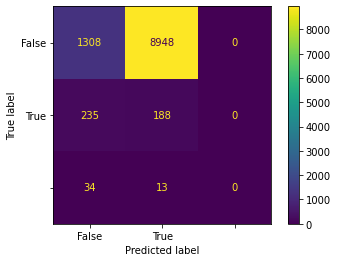

In [ ]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
plt.figure(figsize=(10,10))
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(int_array, y_confusion, average='micro'), recall_score(int_array, y_confusion, average='micro')

(0.13947417490210703, 0.13947417490210703)

In [ ]:
from sklearn.metrics import f1_score
f1_score(int_array, y_confusion, average='micro')

0.13947417490210703